Results for Connection:
Best n_neighbors: 10
Best ROC AUC: 0.9650537634408602
-


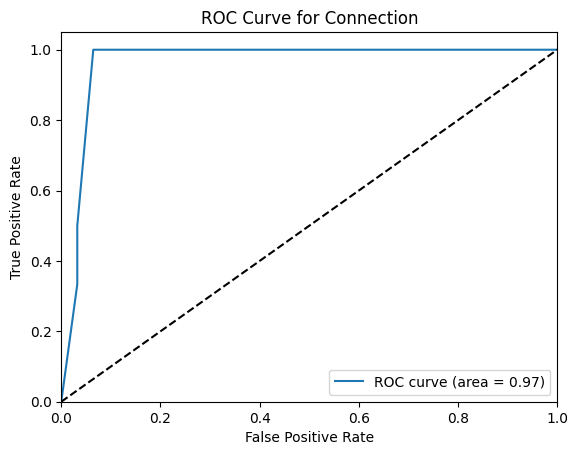

Results for Stress Management:
Best n_neighbors: 4
Best ROC AUC: 0.9285714285714286
-


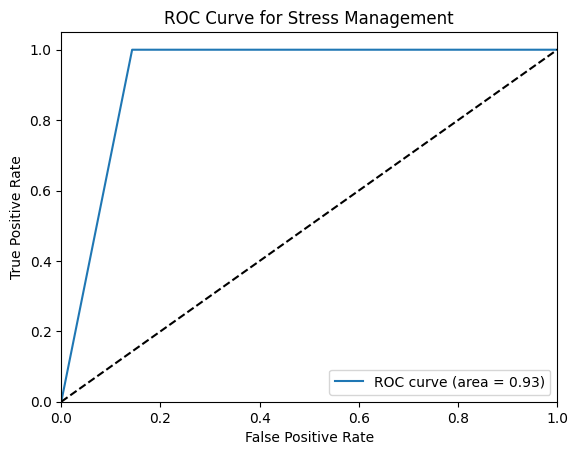

Results for Food:
Best n_neighbors: 9
Best ROC AUC: 0.9838709677419355
-


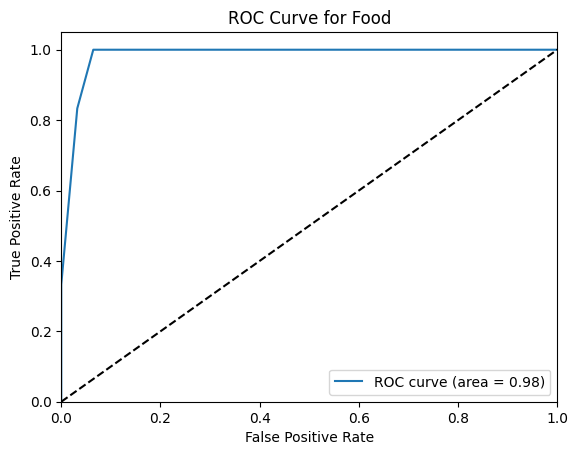

Results for Movement:
Best n_neighbors: 9
Best ROC AUC: 0.9615384615384615
-


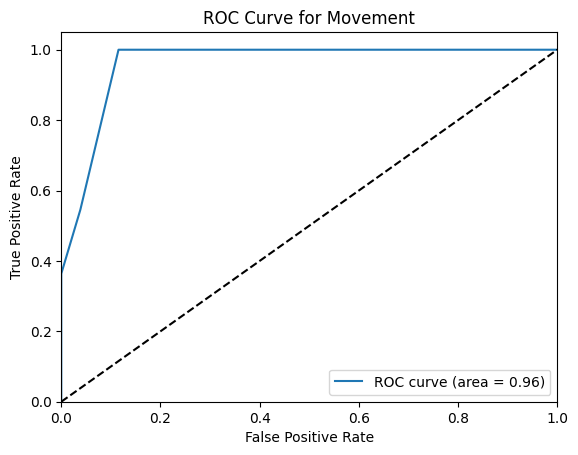

Results for Sleep:
Best n_neighbors: 6
Best ROC AUC: 0.996875
-


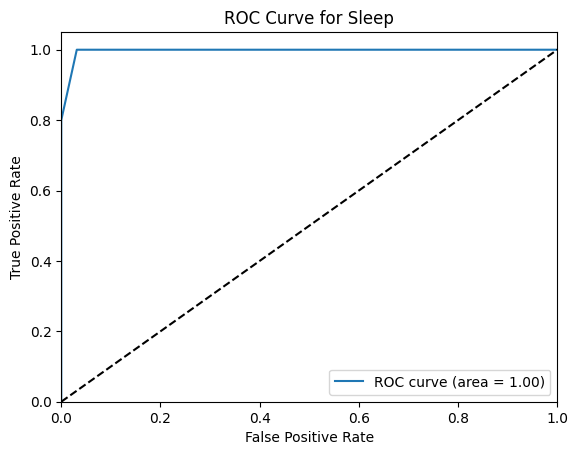

Final results for Connection:
Best n_neighbors: 10
Best ROC AUC: 0.9650537634408602
-
Final results for Stress Management:
Best n_neighbors: 4
Best ROC AUC: 0.9285714285714286
-
Final results for Food:
Best n_neighbors: 9
Best ROC AUC: 0.9838709677419355
-
Final results for Movement:
Best n_neighbors: 9
Best ROC AUC: 0.9615384615384615
-
Final results for Sleep:
Best n_neighbors: 6
Best ROC AUC: 0.996875
-


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

embeddings_file = 'openai_embeddings.tsv'
metadata_file = 'intentions_metadata.tsv'

embeddings_df = pd.read_csv(embeddings_file, sep='\t', header=None)
metadata_df = pd.read_csv(metadata_file, sep='\t')

X = embeddings_df.values

journeys = ['Connection', 'Stress Management', 'Food', 'Movement', 'Sleep']

def train_and_evaluate_knn(X, y, n_neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, metric='cosine')
    neigh.fit(X_train, y_train)
    
    predictions = neigh.predict(X_test)
    probabilities = neigh.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probabilities)
    report = classification_report(y_test, predictions, zero_division=1)
    
    return accuracy, roc_auc, report, y_test, probabilities

results = {}
for journey in journeys:
    y = [1 if label == journey else 0 for label in metadata_df['journey_label']]
    
    best_auc = 0
    best_n_neighbors = 0
    for n in range(1, 11):
        accuracy, roc_auc, report, y_test, probabilities = train_and_evaluate_knn(X, y, n)
        if roc_auc > best_auc:
            best_auc = roc_auc
            best_n_neighbors = n
            best_report = report
            best_y_test = y_test
            best_probabilities = probabilities
    
    results[journey] = {
        'best_n_neighbors': best_n_neighbors,
        'best_auc': best_auc,
    }
    
    print(f"Results for {journey}:")
    print(f"Best n_neighbors: {best_n_neighbors}")
    print(f"Best ROC AUC: {best_auc}")
    '''print("Classification Report:")
    print(best_report)'''
    print("-")

    fpr, tpr, _ = roc_curve(best_y_test, best_probabilities)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {best_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {journey}')
    plt.legend(loc="lower right")
    plt.show()

for journey, result in results.items():
    print(f"Final results for {journey}:")
    print(f"Best n_neighbors: {result['best_n_neighbors']}")
    print(f"Best ROC AUC: {result['best_auc']}")
    print("-")
